Main Steps in any ML project (Harley's steps)

<ol>
    <li>Define objective</li>
    <li>Load the data</li>
    <li>Explore the data</li>
    <li>Feature Engineering</li>
    <li>Test some ML Models</li>
    <li>Optimize the data</li>
    <li>Tune the Model</li>
    <li>Formalize the process</li>
</ol>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
import ssl
import certifi

ssl._create_default_https_context = ssl._create_unverified_context
dataset = fetch_openml(data_id=40945, as_frame=True)

In [3]:
df = dataset.frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   category
 2   name       1309 non-null   object  
 3   sex        1309 non-null   category
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   category
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
dtypes: category(3), float64(6), object(5)
memory usage: 116.8+ KB


In [7]:
master = df.copy()

In [9]:
labels = df['survived']
df.drop(['survived'], axis=1, inplace=True)

In [10]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


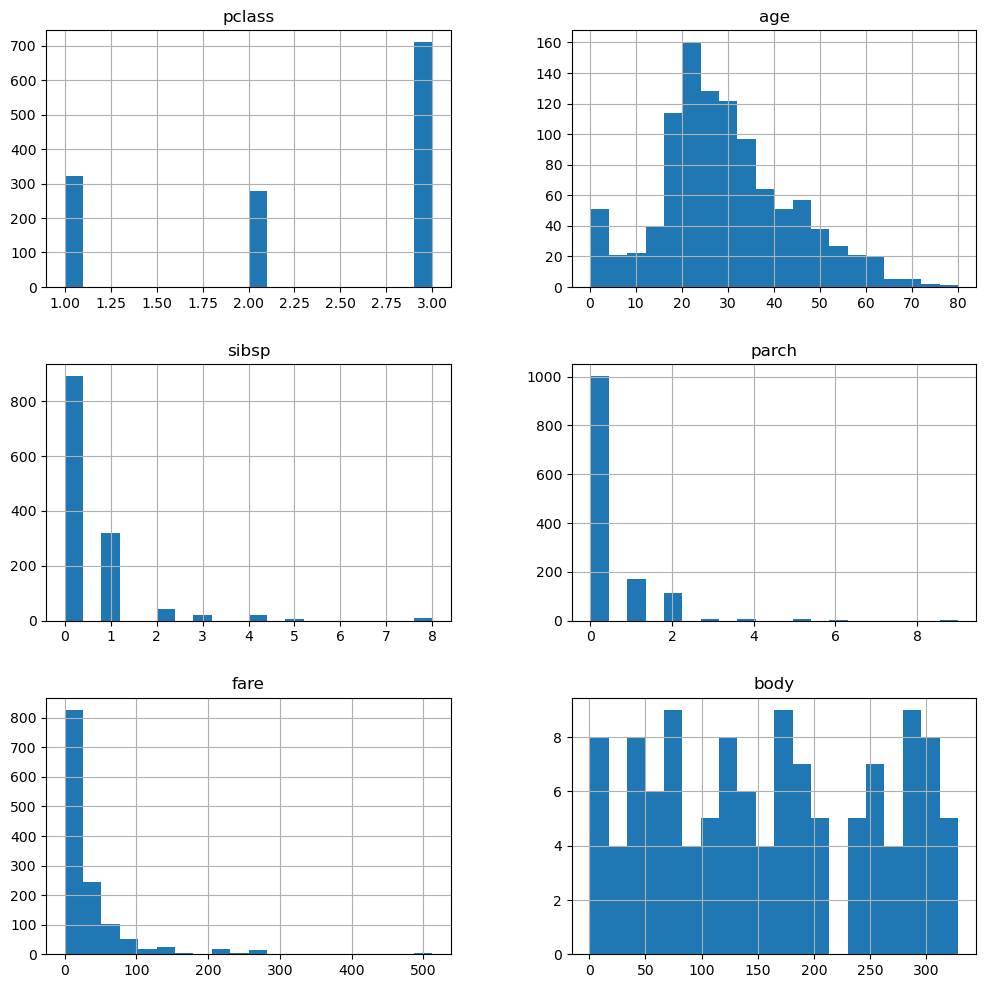

In [13]:
df.hist(bins=20, figsize=(12, 12))
plt.show()

In [14]:
df['pclass'].value_counts()

3.0    709
1.0    323
2.0    277
Name: pclass, dtype: int64

In [15]:
df['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [16]:
df['embarked'].value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [21]:
df = master.copy()

In [38]:
df['survived'] = df['survived'].astype('int')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [23]:
corr_matrix = df.corr()

In [25]:
corr_matrix['survived'].sort_values()

pclass     -0.312469
age        -0.055513
sibsp      -0.027825
parch       0.082660
fare        0.244265
survived    1.000000
body             NaN
Name: survived, dtype: float64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   int64  
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1309 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1309 non-null   int64  
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(6), int64(3), object(5)
memory usage: 143.3+ KB


In [27]:
df['sex'] = df['sex'].astype('object')

In [45]:
df['fare'] = df['fare'].fillna(0.0)

In [30]:
from sklearn.preprocessing import LabelEncoder

In [35]:
sex_encoder = LabelEncoder()
df['sex'] = sex_encoder.fit_transform(df['sex'])

In [36]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [37]:
#df['sex'] = sex_encoder.inverse_transform(df['sex'])
#df.head()

In [44]:
df['embarked'] = df['embarked'].fillna('S').astype('object')

embarked_encoder = LabelEncoder()
df['embarked'] = embarked_encoder.fit_transform(df['embarked'])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0.0,0.0,24160,211.3375,B5,2,2,NaN,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",1,0.9167,1.0,2.0,113781,151.5500,C22 C26,2,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",0,2.0000,1.0,2.0,113781,151.5500,C22 C26,2,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1.0,2.0,113781,151.5500,C22 C26,2,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1.0,2.0,113781,151.5500,C22 C26,2,None,NaN,"Montreal, PQ / Chesterville, ON"


In [47]:
df['age'] = df['age'].fillna(df['age'].mean())

In [49]:
df2 = df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis=1)
df2.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1,0,29.0000,0.0,0.0,211.3375,2
1,1.0,1,1,0.9167,1.0,2.0,151.5500,2
2,1.0,0,0,2.0000,1.0,2.0,151.5500,2
3,1.0,0,1,30.0000,1.0,2.0,151.5500,2
4,1.0,0,0,25.0000,1.0,2.0,151.5500,2


In [51]:
from sklearn.model_selection import train_test_split

labels = df2['survived']
features = df2.drop(['survived'], axis=1)

#train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.2, random_state=42)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score

In [56]:
models = [
    ['LogisticRegression', LogisticRegression()],
    ['KNeighborsClassifier', KNeighborsClassifier()],
    ['DecisionTreeClassifier', DecisionTreeClassifier()],
    ['SVC', SVC()],
    ['RandomForestClassifier', RandomForestClassifier()],
    ['GaussianNB', GaussianNB()]
]

In [65]:
import warnings

warnings.filterwarnings('ignore')

for name, model in models:
    scores = cross_val_score(model, features, labels, cv=10)
    print(f'{name} = {scores.mean() * 100}')

LogisticRegression = 76.85261303581913
KNeighborsClassifier = 64.86376981796829
DecisionTreeClassifier = 71.50616559013507
SVC = 65.92483852025836
RandomForestClassifier = 74.32824427480917
GaussianNB = 74.10569583088666
